# Cumulative Gain and Loss from the Snow depth timeseries of treatment plots from WY2023
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [ ]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

Open the cleaned pickle files

In [3]:
# forest and gap sites 
CNF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF21.pkl", "rb"))
CNG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG21.pkl", "rb"))
CSF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF21.pkl", "rb"))
CSG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG21.pkl", "rb"))

CNF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF23.pkl", "rb"))
CNG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG23.pkl", "rb"))
CSF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF23.pkl", "rb"))
CSG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG23.pkl", "rb"))

# the other post treatment sites 
CN20 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN20.pkl", "rb"))
CN50 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN50.pkl", "rb"))
CN60 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN60.pkl", "rb"))
CN70 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN70.pkl", "rb"))

CS20  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS20.pkl", "rb"))
CS50  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS50.pkl", "rb"))
CS60  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS60.pkl", "rb"))
CS120 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS120.pkl", "rb"))

In [4]:
# now the SDD files too
SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

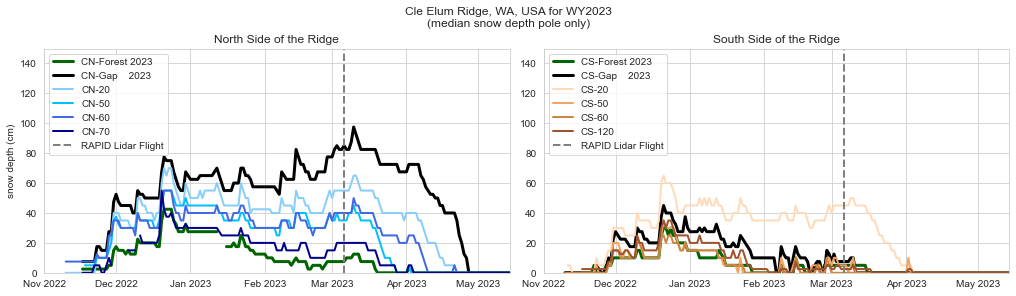

In [5]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Plot the fill between for all the sites too

Plot the same BAFs on the north and south together to compare 

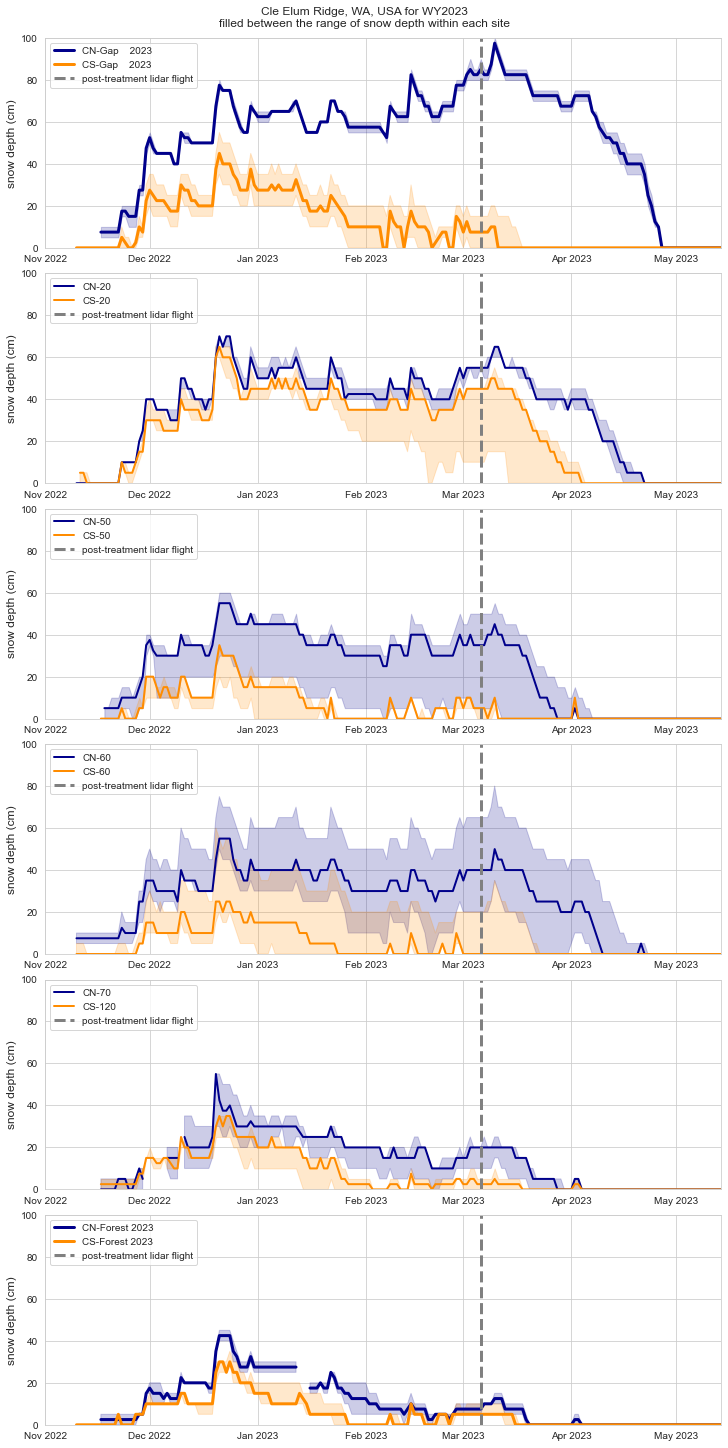

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

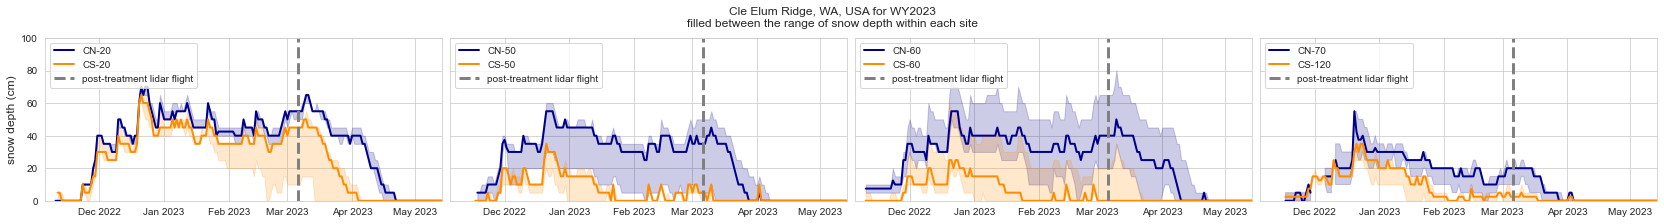

In [7]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,4,figsize = (23,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)
# ax[2].set_ylabel("snow depth (cm)", fontsize=12)
# ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_12384\3129241684.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_12384\3129241684.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


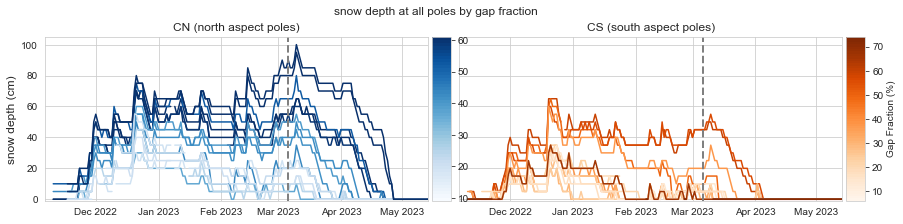

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,3), sharex=True, sharey=True, constrained_layout=True)

plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
# plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("CN (north aspect poles)")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("CS (south aspect poles)")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

# Stevens Code 

In [9]:
def cumulative_gain_loss(x, y):
    
    # calculate the difference in y values between each time step x
    delta_y = np.diff(y)
    
    # calculate the cumulative sum for all delta_y where the change was positive
    gains = np.cumsum(delta_y[delta_y > 0])
    # get the time steps (x coordinates) when those positive changes happened
    x_gains = x[1:][delta_y > 0]
    
    # calculate the cumulative sum for all delta_y where the change was negative
    losses = np.cumsum(delta_y[delta_y < 0])
    # get the time steps (x coordinates) when those negative changes happened
    x_losses = x[1:][delta_y < 0]
    
    return (x_gains, gains), (x_losses, losses)

In [25]:
CN20['Date']

Date
2022-11-10   2022-11-10
2022-11-11   2022-11-11
2022-11-12   2022-11-12
2022-11-13   2022-11-13
2022-11-14   2022-11-14
                ...    
2023-06-10   2023-06-10
2023-06-11   2023-06-11
2023-06-12   2023-06-12
2023-06-13   2023-06-13
2023-06-14   2023-06-14
Name: Date, Length: 217, dtype: datetime64[ns]

In [10]:
x = CN20['Date']
y = CN20['Median_depth']

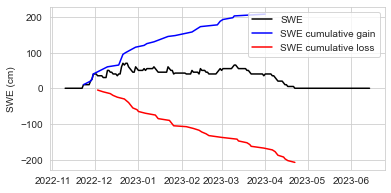

In [11]:
(x_gains, gains), (x_losses, losses) = cumulative_gain_loss(x, y)


plt.figure(figsize=(6,3))
plt.plot(x,y,c='k', label='SWE')
plt.plot(x_gains, gains, c='b', label='SWE cumulative gain')
plt.plot(x_losses, losses, c='r', label='SWE cumulative loss')
plt.ylabel('SWE (cm)')
plt.legend()

In [12]:
(CN20_x_gains, CN20_gains), (CN20_x_losses, CN20_losses) = cumulative_gain_loss(CN20['Date'], y = CN20['Median_depth'])
(CN50_x_gains, CN50_gains), (CN50_x_losses, CN50_losses) = cumulative_gain_loss(CN50['Date'], y = CN50['Median_depth'])
(CN60_x_gains, CN60_gains), (CN60_x_losses, CN60_losses) = cumulative_gain_loss(CN60['Date'], y = CN60['Median_depth'])
(CN70_x_gains, CN70_gains), (CN70_x_losses, CN70_losses) = cumulative_gain_loss(CN70['Date'], y = CN70['Median_depth'])
(CNF23_x_gains, CNF23_gains), (CNF23_x_losses, CNF23_losses) = cumulative_gain_loss(CNF23['Date'], y = CNF23['Median_depth'])
(CNG23_x_gains, CNG23_gains), (CNG23_x_losses, CNG23_losses) = cumulative_gain_loss(CNG23['Date'], y = CNG23['Median_depth'])

(CS20_x_gains, CS20_gains), (CS20_x_losses, CS20_losses) = cumulative_gain_loss(CS20['Date'], y = CS20['Median_depth'])
(CS50_x_gains, CS50_gains), (CS50_x_losses, CS50_losses) = cumulative_gain_loss(CS50['Date'], y = CS50['Median_depth'])
(CS60_x_gains, CS60_gains), (CS60_x_losses, CS60_losses) = cumulative_gain_loss(CS60['Date'], y = CS60['Median_depth'])
(CS120_x_gains, CS120_gains), (CS120_x_losses, CS120_losses) = cumulative_gain_loss(CS120['Date'], y = CS120['Median_depth'])
(CSF23_x_gains, CSF23_gains), (CSF23_x_losses, CSF23_losses) = cumulative_gain_loss(CSF23['Date'], y = CSF23['Median_depth'])
(CSG23_x_gains, CSG23_gains), (CSG23_x_losses, CSG23_losses) = cumulative_gain_loss(CSG23['Date'], y = CSG23['Median_depth'])

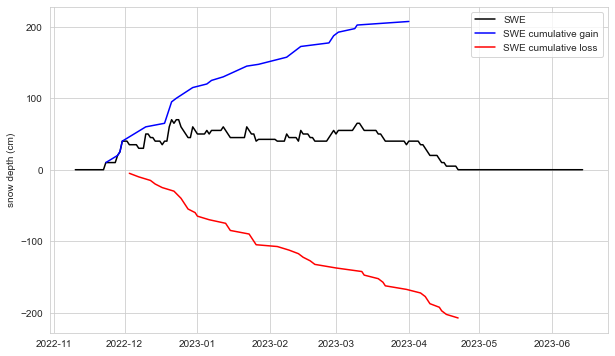

In [14]:
plt.figure(figsize=(10,6))
plt.plot(CN20['Date'],CN20['Median_depth'],c='k', label='SWE')
plt.plot(CN20_x_gains, CN20_gains, c='b', label='SWE cumulative gain')
plt.plot(CN20_x_losses, CN20_losses, c='r', label='SWE cumulative loss')
plt.ylabel('snow depth (cm)')
plt.legend()

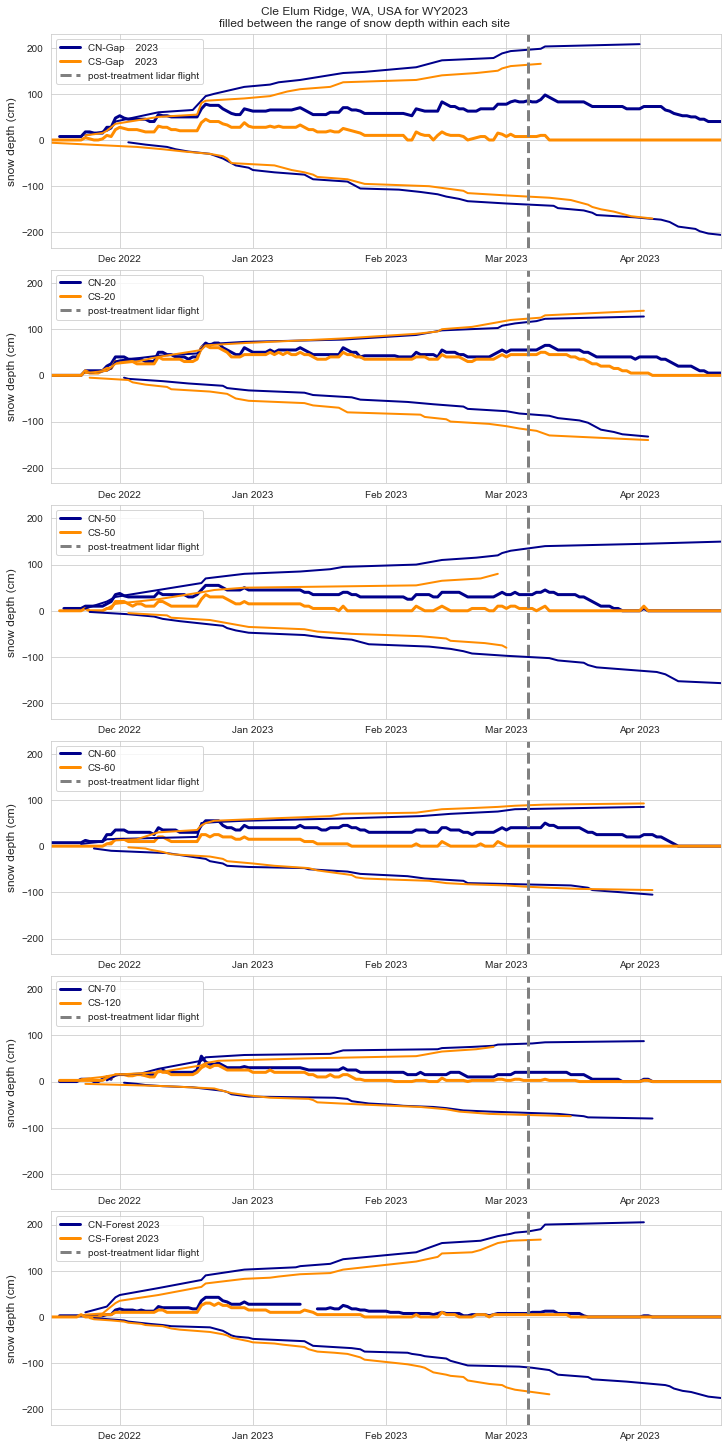

In [24]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=3)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=3)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=3)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=3)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=3)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=3)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=3)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=3)

# PLOT THE CUMULATIVE GAIN AND LOSS
ax[0].plot(CN20_x_gains, CN20_gains, c=colornorth, label='', linewidth=2)
ax[0].plot(CN20_x_losses, CN20_losses, c=colornorth, label='', linewidth=2)
ax[1].plot(CN50_x_gains, CN50_gains, c=colornorth, label='', linewidth=2)
ax[1].plot(CN50_x_losses, CN50_losses, c=colornorth, label='', linewidth=2)
ax[2].plot(CN60_x_gains, CN60_gains, c=colornorth, label='', linewidth=2)
ax[2].plot(CN60_x_losses, CN60_losses, c=colornorth, label='', linewidth=2)
ax[3].plot(CN70_x_gains, CN70_gains, c=colornorth, label='', linewidth=2)
ax[3].plot(CN70_x_losses, CN70_losses, c=colornorth, label='', linewidth=2)
ax[4].plot(CNF23_x_gains, CNF23_gains, c=colornorth, label='', linewidth=2)
ax[4].plot(CNF23_x_losses, CNF23_losses, c=colornorth, label='', linewidth=2)
ax[5].plot(CNG23_x_gains, CNG23_gains, c=colornorth, label='', linewidth=2)
ax[5].plot(CNG23_x_losses, CNG23_losses, c=colornorth, label='', linewidth=2)

# PLOT THE CUMULATIVE GAIN AND LOSS, for the south side 
ax[0].plot(CS20_x_gains, CS20_gains, c=colorsouth, label='', linewidth=2)
ax[0].plot(CS20_x_losses, CS20_losses, c=colorsouth, label='', linewidth=2)
ax[1].plot(CS50_x_gains, CS50_gains, c=colorsouth, label='', linewidth=2)
ax[1].plot(CS50_x_losses, CS50_losses, c=colorsouth, label='', linewidth=2)
ax[2].plot(CS60_x_gains, CS60_gains, c=colorsouth, label='', linewidth=2)
ax[2].plot(CS60_x_losses, CS60_losses, c=colorsouth, label='', linewidth=2)
ax[3].plot(CS120_x_gains, CS120_gains, c=colorsouth, label='', linewidth=2)
ax[3].plot(CS120_x_losses, CS120_losses, c=colorsouth, label='', linewidth=2)
ax[4].plot(CSF23_x_gains, CSF23_gains, c=colorsouth, label='', linewidth=2)
ax[4].plot(CSF23_x_losses, CSF23_losses, c=colorsouth, label='', linewidth=2)
ax[5].plot(CSG23_x_gains, CSG23_gains, c=colorsouth, label='', linewidth=2)
ax[5].plot(CSG23_x_losses, CSG23_losses, c=colorsouth, label='', linewidth=2)



# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
# ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 15), datetime.date(2023, 4, 20)])
ax[1].set_xlim([datetime.date(2022, 11, 15), datetime.date(2023, 4, 20)])
ax[2].set_xlim([datetime.date(2022, 11, 15), datetime.date(2023, 4, 20)])
ax[3].set_xlim([datetime.date(2022, 11, 15), datetime.date(2023, 4, 20)])
ax[4].set_xlim([datetime.date(2022, 11, 15), datetime.date(2023, 4, 20)])
ax[5].set_xlim([datetime.date(2022, 11, 15), datetime.date(2023, 4, 20)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

and, how he used it below

In [ ]:
# modeled SWE
y = mod_snow[tmb:tme].Swq.values
# model time steps
x = mod_snow[tmb:tme].Swq.index

(x_gains, gains), (x_losses, losses) = cumulative_gain_loss(x, y)


plt.figure(figsize=(6,3))
plt.plot(x,y,c='k', label='SWE')
plt.plot(x_gains, gains, c='b', label='SWE cumulative gain')
plt.plot(x_losses, losses, c='r', label='SWE cumulative loss')
plt.ylabel('SWE (cm)')
plt.legend()

# MY ATTEMPTED BELOW ________________________________
## Make calculations for cumulative gain and loss analysis 
* When snow was present (at both sites?), we computed the change in snow depth for each day
(delta depth (forest) and delta depth (gap))
* then, summed daily gain and loss through time 

* For days where data was missing or snow depth was zero (measured as < 1 cm) at either site, then that data was excluded. 

Then, 
* All positive delta depth values are gain, and all negative delta depth values are loss. 
This does nto account for the subdaily fluctuation in depth, snow compaction, or spatial variation in snow density. 

In [23]:
# compute the change in snow depth for each day 
CNF23['Change'] = CNF23['Median_depth'].diff()
CNG23['Change'] = CNG23['Median_depth'].diff()
CSF23['Change'] = CSF23['Median_depth'].diff()
CSG23['Change'] = CSG23['Median_depth'].diff()

CS20['Change'] = CS20['Median_depth'].diff()
CS50['Change'] = CS50['Median_depth'].diff()
CS60['Change'] = CS60['Median_depth'].diff()
CS120['Change'] = CS120['Median_depth'].diff()

CN20['Change'] = CN20['Median_depth'].diff()
CN50['Change'] = CN50['Median_depth'].diff()
CN60['Change'] = CN60['Median_depth'].diff()
CN70['Change'] = CN70['Median_depth'].diff()

In [24]:
# now, sum the change in snow depth for each day for each site
CNF23['CumulativeChange'] = CNF23['Change'].cumsum()
CNG23['CumulativeChange'] = CNG23['Change'].cumsum()
CSF23['CumulativeChange'] = CSF23['Change'].cumsum()
CSG23['CumulativeChange'] = CSG23['Change'].cumsum()

CS20['CumulativeChange'] = CS20['Change'].cumsum()
CS50['CumulativeChange'] = CS50['Change'].cumsum()
CS60['CumulativeChange'] = CS60['Change'].cumsum()
CS120['CumulativeChange'] = CS120['Change'].cumsum()

CN20['CumulativeChange'] = CN20['Change'].cumsum()
CN50['CumulativeChange'] = CN50['Change'].cumsum()
CN60['CumulativeChange'] = CN60['Change'].cumsum()
CN70['CumulativeChange'] = CN70['Change'].cumsum()

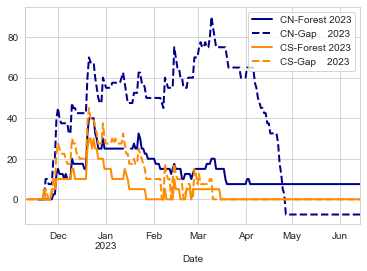

In [25]:
# plot the cumulative change in snow depth for each site
sns.set_style("whitegrid")
CNF23['CumulativeChange'].plot(label="CN-Forest 2023", color = 'darkblue', linewidth=2)
CNG23['CumulativeChange'].plot(label="CN-Gap    2023", color = 'darkblue', linestyle='--', linewidth=2)
CSF23['CumulativeChange'].plot(label="CS-Forest 2023", color = 'darkorange', linewidth=2)
CSG23['CumulativeChange'].plot(label="CS-Gap    2023", color = 'darkorange', linestyle='--', linewidth=2)

plt.legend()

# CS20['CumulativeChange'].plot(label="CS-20", color = 'lightskyblue', linewidth=2)
# CS50['CumulativeChange'].plot(label="CS-50", color = 'deepskyblue', linewidth=2)
# CS60['CumulativeChange'].plot(label="CS-60", color = 'royalblue', linewidth=2)
# CS120['CumulativeChange'].plot(label="CS-120", color = 'darkblue', linewidth=2)

# CN20['CumulativeChange'].plot(label="CN-20", color = 'peachpuff', linewidth=2)
# CN50['CumulativeChange'].plot(label="CN-50", color = 'sandybrown', linewidth=2)
# CN60['CumulativeChange'].plot(label="CN-60", color = 'peru', linewidth=2)
# CN70['CumulativeChange'].plot(label="CN-70", color = 'sienna', linewidth=2)

In [30]:
# if the cumulative change in snow depth increased from the previous day, then this is saved as a new variable, gain
# if the cumulative change in snow depth decreased from the previous day, then this is saved as a new variable, loss
CNF23['Gain'] = (CNF23['CumulativeChange']).where(CNF23['CumulativeChange'] - CNF23['CumulativeChange'].shift(-1) > 0)
CNF23['Loss'] = (CNF23['CumulativeChange']).where(CNF23['CumulativeChange'] - CNF23['CumulativeChange'].shift(-1) < 0)

<AxesSubplot:xlabel='Date'>

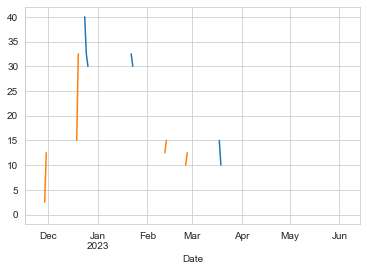

In [31]:
CNF23['Gain'].plot()
CNF23['Loss'].plot()

In [18]:
# where the culmulative change is zero, set it to NaN
CNF23.loc[CNF23['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CNG23.loc[CNG23['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CSF23.loc[CSF23['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CSG23.loc[CSG23['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan

CS20.loc[CS20['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CS50.loc[CS50['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CS60.loc[CS60['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CS120.loc[CS120['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan

CN20.loc[CN20['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CN50.loc[CN50['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CN60.loc[CN60['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan
CN70.loc[CN70['CumulativeChange'] == 0, 'CumulativeChange'] = np.nan

# and where the change is positive, make this a new variable, gain 
CNF23['Gain'] = CNF23['CumulativeChange'].where(CNF23['CumulativeChange'] > 1)
CNG23['Gain'] = CNG23['CumulativeChange'].where(CNG23['CumulativeChange'] > 1)
CSF23['Gain'] = CSF23['CumulativeChange'].where(CSF23['CumulativeChange'] > 1)
CSG23['Gain'] = CSG23['CumulativeChange'].where(CSG23['CumulativeChange'] > 1)

CS20['Gain'] = CS20['CumulativeChange'].where(CS20['CumulativeChange'] > 1)
CS50['Gain'] = CS50['CumulativeChange'].where(CS50['CumulativeChange'] > 1)
CS60['Gain'] = CS60['CumulativeChange'].where(CS60['CumulativeChange'] > 1)
CS120['Gain'] = CS120['CumulativeChange'].where(CS120['CumulativeChange'] > 1)

CN20['Gain'] = CN20['CumulativeChange'].where(CN20['CumulativeChange'] > 1)
CN50['Gain'] = CN50['CumulativeChange'].where(CN50['CumulativeChange'] > 1)
CN60['Gain'] = CN60['CumulativeChange'].where(CN60['CumulativeChange'] > 1)
CN70['Gain'] = CN70['CumulativeChange'].where(CN70['CumulativeChange'] > 1)

# and where the change is negative, make this a new variable, loss
CNF23['Loss'] = CNF23['CumulativeChange'].where(CNF23['CumulativeChange'] < 1)
CNG23['Loss'] = CNG23['CumulativeChange'].where(CNG23['CumulativeChange'] < 1)
CSF23['Loss'] = CSF23['CumulativeChange'].where(CSF23['CumulativeChange'] < 1)
CSG23['Loss'] = CSG23['CumulativeChange'].where(CSG23['CumulativeChange'] < 1)

CS20['Loss'] = CS20['CumulativeChange'].where(CS20['CumulativeChange'] < 1)
CS50['Loss'] = CS50['CumulativeChange'].where(CS50['CumulativeChange'] < 1)
CS60['Loss'] = CS60['CumulativeChange'].where(CS60['CumulativeChange'] < 1)
CS120['Loss'] = CS120['CumulativeChange'].where(CS120['CumulativeChange'] < 1)

CN20['Loss'] = CN20['CumulativeChange'].where(CN20['CumulativeChange'] < 1)
CN50['Loss'] = CN50['CumulativeChange'].where(CN50['CumulativeChange'] < 1)
CN60['Loss'] = CN60['CumulativeChange'].where(CN60['CumulativeChange'] < 1)
CN70['Loss'] = CN70['CumulativeChange'].where(CN70['CumulativeChange'] < 1)

Trying this instead...

<AxesSubplot:xlabel='Date'>

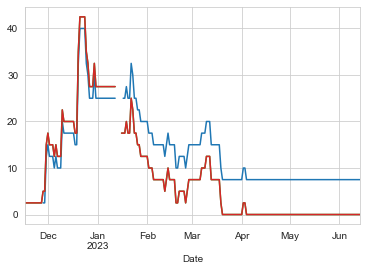

In [22]:
CNF23['Gain'].plot()
CNF23['Loss'].plot()

CNF23['Median_depth'].plot()
CNF23['Median_depth'].plot()

# CNG23['Gain'].plot()
# CNG23['Loss'].plot()

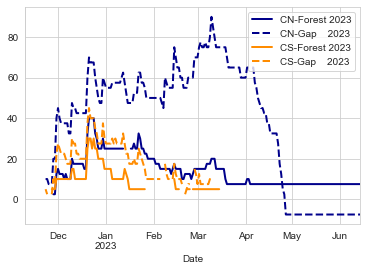

In [17]:
# plot the cumulative change in snow depth for each site
sns.set_style("whitegrid")
CNF23['CumulativeChange'].plot(label="CN-Forest 2023", color = 'darkblue', linewidth=2)
CNG23['CumulativeChange'].plot(label="CN-Gap    2023", color = 'darkblue', linestyle='--', linewidth=2)
CSF23['CumulativeChange'].plot(label="CS-Forest 2023", color = 'darkorange', linewidth=2)
CSG23['CumulativeChange'].plot(label="CS-Gap    2023", color = 'darkorange', linestyle='--', linewidth=2)

plt.legend()

# CS20['CumulativeChange'].plot(label="CS-20", color = 'lightskyblue', linewidth=2)
# CS50['CumulativeChange'].plot(label="CS-50", color = 'deepskyblue', linewidth=2)
# CS60['CumulativeChange'].plot(label="CS-60", color = 'royalblue', linewidth=2)
# CS120['CumulativeChange'].plot(label="CS-120", color = 'darkblue', linewidth=2)

# CN20['CumulativeChange'].plot(label="CN-20", color = 'peachpuff', linewidth=2)
# CN50['CumulativeChange'].plot(label="CN-50", color = 'sandybrown', linewidth=2)
# CN60['CumulativeChange'].plot(label="CN-60", color = 'peru', linewidth=2)
# CN70['CumulativeChange'].plot(label="CN-70", color = 'sienna', linewidth=2)

<AxesSubplot:xlabel='Date'>

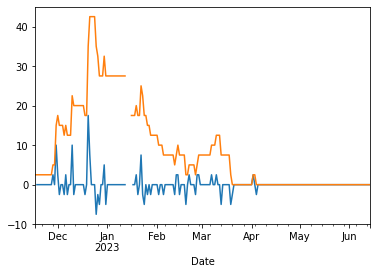

In [7]:
CNF23['Change'].plot()
CNF23['Median_depth'].plot()